<a href="https://colab.research.google.com/github/cliu001/machine-learning/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k=1, Inertia=600.0000000000001
k=2, Inertia=222.36170496502302
k=3, Inertia=139.82049635974982
k=4, Inertia=114.35407164049776
k=5, Inertia=90.92751382392049
k=6, Inertia=80.02218752722621
k=7, Inertia=71.03343108154417
k=8, Inertia=62.51430580335557
k=9, Inertia=54.09786462356245
k=10, Inertia=47.51904068157667


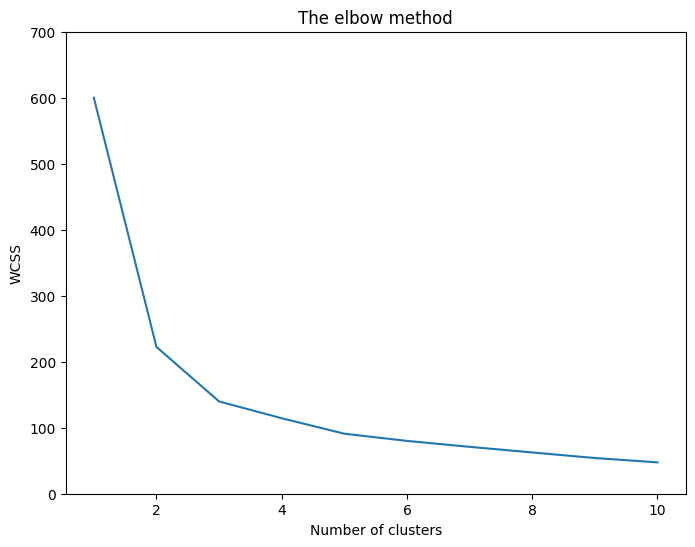

Accuracy: 0.9166


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Optional Step 2: Standardize the feature matrix
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 3: Perform k-Means clustering with different values of k
inertia_values = []

# Define a range of k values to try
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # Add n_init parameter
    kmeans.fit(X_std)  # Use standardized data if you performed Step 2
    inertia_values.append(kmeans.inertia_)

# Step 4: Calculate the Within-Cluster-Sum-of-Squares (WCSS) or inertia
for k, inertia in zip(k_values, inertia_values):
    print(f'k={k}, Inertia={inertia}')


# Step 5: Plot the inertia values for different values of k
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ylim(0, 700)  # 设置 y 轴的上下限
plt.title('The elbow method')
plt.show()
# task 2

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', parser='pandas', data_home="./data")

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Step 3: Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply PCA for dimensionality reduction
n_components = 100  # Number of components for PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Apply logistic regression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr.fit(X_train_pca, y_train)

# Step 6: Get accuracy
y_pred = logisticRegr.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

